In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import random
n = 100
n_features = 1

X = np.arange(0, n, 1).reshape((n, 1))
y = (X/n + np.random.normal(0, 0.1, X.shape)).round()

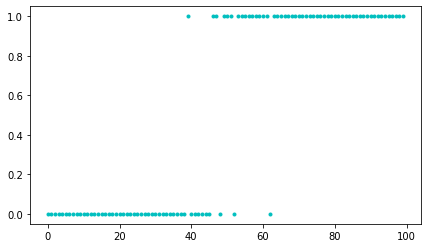

In [3]:
plt.figure(figsize = (7,4))
plt.plot(X, y, 'c.')

In [4]:
def g(X, b, w):
    z = (b + np.dot(w, X.T)).reshape(X.shape)
    
    return 1 / (1 + np.exp(-1 * z)).reshape(X.shape)

In [5]:
g(X[0:5], 0, np.array([1/n]))

array([[0.5       ],
       [0.50249998],
       [0.50499983],
       [0.50749944],
       [0.50999867]])

In [6]:
X.shape, g(X, 0, np.array([1/n])).shape, y.shape

((100, 1), (100, 1), (100, 1))

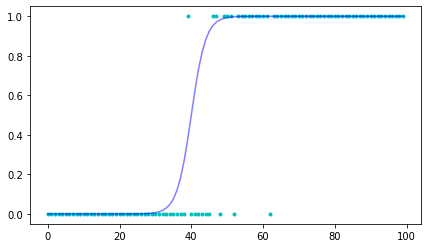

In [7]:
plt.figure(figsize = (7,4))
plt.plot(X, y, 'c.')
plt.plot(X, g(X, -20, np.array([0.5])), 'b-', alpha=0.5)

In [8]:
def gradient_descent(b = 0, w = np.zeros((n_features, 1)), alpha = 0.01, step_by_step = False):
    
    steps_w, steps_b = [], []
    step = 0
    
    while(step < 2500):
        f = g(X, b, w)
        
        db = np.sum(f-y) / n
        dw = np.dot(X.T, (f-y)) / n
        #print(db)
        #print(dw)
        
        b = float(b - alpha * db)
        w = w - alpha * dw
        
        steps_w += [w]
        steps_b += [b]
        step += 1
        #print(b)
        #print(w)
    
    if step_by_step:
        return steps_b, steps_w
    else:
        return steps_b[-1], steps_w[-1]

In [9]:
b_pred, w_pred = gradient_descent(step_by_step = True)

In [10]:
b_pred[-1], w_pred[-1]

(-3.309672142326057, array([[0.0893875]]))

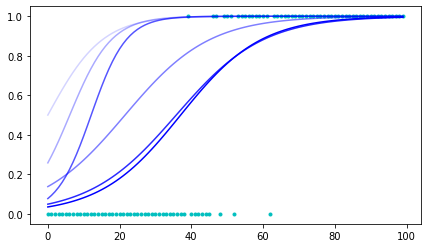

In [11]:
plt.figure(figsize = (7,4))
plt.plot(X, y, 'c.')
for i in range(5):
    plt.plot(X, g(X, b_pred[int(len(b_pred)*i/5)], w_pred[int(len(w_pred)*i/5)]), 'b-', alpha=(1+i)/6)
plt.plot(X, g(X, b_pred[-1], w_pred[-1]), 'b-')

In [12]:
g(X[0], b_pred[-1], w_pred[-1]), g(X[-1], b_pred[-1], w_pred[-1])

(array([0.03524086]), array([0.99608762]))

In [13]:
def predict(x, b, w, pr = 0.5):
    p = g(x, b, w)
    
    if p >= pr:
        return 1
    else:
        return 0

In [14]:
predict(X[0], b_pred[-1], w_pred[-1]), predict(X[-1], b_pred[-1], w_pred[-1])

(0, 1)

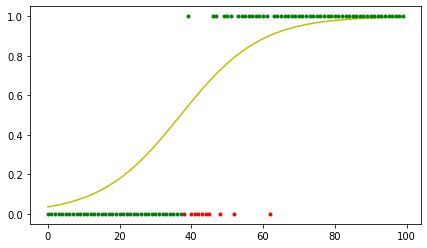

In [15]:
true_pred, false_pred = [], []
for i in range(len(X)):
    if predict(X[i], b_pred[-1], w_pred[-1]) == y[i]:
        true_pred += [i]
    else:
        false_pred += [i]
    

plt.figure(figsize = (7,4))
plt.plot(X, g(X, b_pred[-1], w_pred[-1]), 'y-')
plt.plot(false_pred, y[false_pred], 'r.')
plt.plot(true_pred, y[true_pred], 'g.')

In [16]:
len(false_pred)

10

In [17]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X[:], y[:])

clf.intercept_, clf.coef_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([-3.74873329]), array([[0.08602358]]))

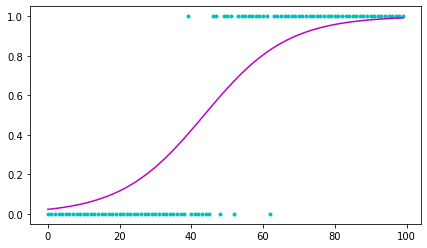

In [18]:
plt.figure(figsize = (7,4))
plt.plot(X, y, 'c.')
plt.plot(X, g(X, clf.intercept_, clf.coef_), 'm-')

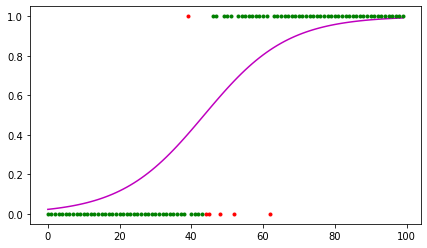

In [19]:
true_pred, false_pred = [], []
for i in range(len(X)):
    if predict(X[i], clf.intercept_, clf.coef_) == y[i]:
        true_pred += [i]
    else:
        false_pred += [i]
    

plt.figure(figsize = (7,4))
plt.plot(X, g(X, clf.intercept_, clf.coef_), 'm-')
plt.plot(false_pred, y[false_pred], 'r.')
plt.plot(true_pred, y[true_pred], 'g.')

In [20]:
len(false_pred)

6